# Fisher Transformation

## • Coding Part

### 1. Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Reading the csv to a Pandas dataframe

In [2]:
data = pd.read_csv("stock_prices.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.785904,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,73.068573,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.650787,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,73.304413,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,74.483597,132079200


### 3. Calculating the required values

In [3]:
data["Mid_Price"] = (data["High"] + data["Low"])/2
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Mid_Price
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.785904,135480400,74.473751
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,73.068573,146322800,74.634998
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.650787,118387200,74.088749
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,73.304413,108872000,74.797501
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,74.483597,132079200,75.200001


In [4]:
ft = pd.DataFrame(columns=['Date', 'Scaled', 'Data'])
ft["Date"] = data["Date"]

### 4. Defining a function to perform the transformation 

In [5]:
import math

def fisher_transformation(N, db):
    for i in range(len(data)):
        N_high = db["Mid_Price"][0 if 0>i-N+1 else i-N:i+1].max()
        N_low = db["Mid_Price"][0 if 0>i-N+1 else i-N:i+1].min()

        if(N_high != N_low):
            delta = db['Mid_Price'][i] - N_low
            span = N_high - N_low

            ft["Scaled"][i] = 2*delta/span - 1

            if(ft["Scaled"][i]==1):
                ft["Scaled"][i] = 0.999

            if(ft["Scaled"][i]==-1):
                ft["Scaled"][i] = -0.999

            ft["Data"][i] = 0.5 * math.log((1 + ft["Scaled"][i])/(1 - ft["Scaled"][i]))

        else:
            ft["Scaled"] = 0
            ft["Data"] = 0
            
    fig = plt.figure(figsize=(25,8))
    price = plt.subplot(4, 1, (1, 3), ylabel="Mean Day Price")
    price.axes.get_xaxis().set_visible(False)
    plt.plot(data["Date"][N:], data["Mid_Price"][N:])
    index = plt.subplot(4, 1, 4, sharex=price, ylabel=f"{N}-day Fisher Transformation")
    plt.plot(ft["Date"][N:], ft["Data"][N:] ,'r')
    index.axes.get_xaxis().set_visible(False)

    plt.savefig(f"{N}-day Fisher Transformation.jpeg",bbox_inches='tight')
    plt.show()

### 5. Calling the function to get the transformation plot

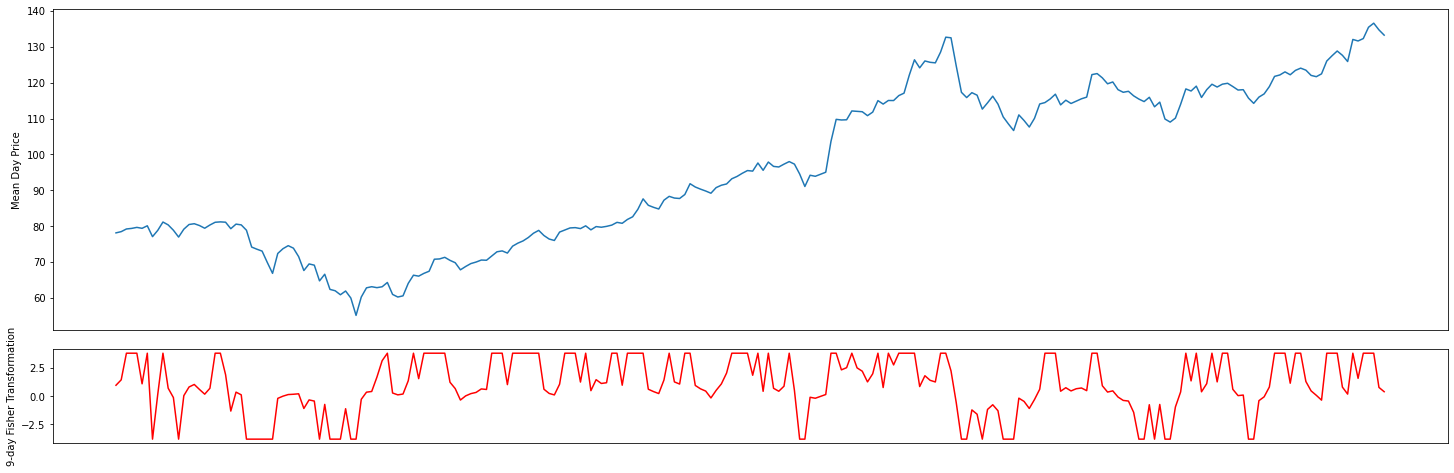

In [6]:
fisher_transformation(9, data)

## • Insights about Fisher Transformation

1. It normalises the data and thus making the trend more clear and noticeable.
2. The normalisation is achieved is like the Gussian Normal Distribution
3. To some extent it even outs the volatile effects of the market.
4. Can be used to predict trend reversals with a bit more certainty.

## • A Potential Trading Strategy

Although a Fisher Transformation plot can give insights about the general trend of the market, it in itslef isn't sufficient to make any reliable strategies.